<a href="https://colab.research.google.com/github/GruAna/VU/blob/master/m_EasyOCR1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EasyOCR

## Packages

In [1]:
!pip install easyocr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 70.8 MB 16 kB/s 
     |████████████████████████████████| 47.6 MB 1.9 MB/s 


In [2]:
import easyocr
import os
import cv2 as cv
import pandas as pd
import matplotlib.pyplot as plt

from tqdm import tqdm

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!cp drive/MyDrive/Colab_Notebooks/VU/utils.py .
from utils import *

## Setup

In [5]:
# if GPU is to be used, allow CUDA
use_GPU = True  # False

## Dataset loading

### CTW1500 dataset

 - testing set (500 images)

Get images. Update location of images **manually**.

Comment if not using CTW1500 dataset.

In [ ]:
# whether images are to be resized (skrinking)
resize = False
width = 3000

# path to image directory, get full path to all files
imgs_dir = '/content/drive/MyDrive/Colab_Notebooks/VU/CTW1500/test_images'

(_, _, filenames) = next(os.walk(imgs_dir))
filenames.sort()
list_img_paths = [os.path.join(imgs_dir, file) for file in filenames]
n_imgs = len(list_img_paths)

# load images
original_images = [(cv.imread(file)) for file in list_img_paths]
                        
# shrink images
if resize:
    images = shrink_all(original_images, width)
else:
    images = original_images.copy()

# Get paths to files with labels. Update location manually
# path to label directory, get full path to all files
labels_dir = '/content/drive/MyDrive/Colab_Notebooks/VU/CTW1500/test_labels'
(_, _, xml_files) = next(os.walk(labels_dir))
xml_files.sort()
list_xml_paths = [os.path.join(labels_dir, file) for file in xml_files]

# Get ground truths from all xml files
ground_truth = []

# if images where resized we need to resize also the coordinates in gt
if resize:
    for i, file in enumerate(list_xml_paths):
        ratio = width / original_images[i].shape[1]
        if ratio > 1:
            ratio = 1
        ground_truth.append(read_gt_ctw_test(file, scaling_ratio=ratio))
else:
    for i, file in enumerate(list_xml_paths):
        ground_truth.append(read_gt_ctw_test(file))

# ground_truth is in the is a list of tuples, where first is the gt word 
# and second is an array of top left and bottom right coordinates
# format: ('text', [[tl,tl],[br,br]])

### KAISTdetectiondataset

In [ ]:
# path to image and label directory, get full path to all files
directory = '/content/drive/MyDrive/Colab_Notebooks/VU/Kaist'

list_img_paths = []
list_bmp_paths = []
list_xml_paths = []
filenames = []
for path, dirs, files in os.walk(directory):
    for file in files:
        if(file.endswith(".jpg") or file.endswith(".JPG") ):
            list_img_paths.append(os.path.join(path, file))
            list_img_paths.sort()
            filenames.append(file)
        if(file.endswith(".bmp")):
            list_bmp_paths.append(os.path.join(path, file))
            list_bmp_paths.sort()
        if(file.endswith(".xml")):
            list_xml_paths.append(os.path.join(path, file))
            list_xml_paths.sort()


n_imgs = len(list_img_paths)
n_bmps = len(list_bmp_paths)
n_labels = len(list_xml_paths)

assert n_imgs == n_labels, "Check both xml and image files"

# whether images are to be resized (skrinking)
resize = False
width = 3000

# load images
original_images = [(cv.imread(file)) for file in list_img_paths]
# load images = bmp images (detected text)
# original_images = [(cv.imread(file)) for file in list_bmp_paths]

# from already text detected images, which are provided in Kaist dataset
# original_images = [(cv.imread(file)) for file in list_bmp_paths]
  
# shrink images
if resize:
    images = shrink_all(original_images, width)
else:
    images = original_images.copy()

# Get ground truths from all xml files
ground_truth = []

# if images where resized we need to resize also the coordinates in gt
if resize:
    for i, file in tqdm(enumerate(list_xml_paths)):
        ratio = width / original_images[i].shape[1]
        if ratio > 1:
            ratio = 1
        ground_truth.append(read_gt_kaist(file, scaling_ratio=ratio))
else:
    for i, file in tqdm(enumerate(list_xml_paths)):
        ground_truth.append(read_gt_kaist(file))

# ground_truth is in the is a list of tuples, where first is the gt word 
# and second is an array of top left and bottom right coordinates
# format: ('text', [[tl,tl],[br,br]])

395it [00:00, 952.08it/s] 


## Born digital dataset

In [ ]:
# path to image and label directory, get full path to all files
imgs_dir = '/content/drive/MyDrive/Colab_Notebooks/VU/BD/Challenge1_Training_Task12_Images'
labels_dir = '/content/drive/MyDrive/Colab_Notebooks/VU/BD/ch1_training_localization_transcription_gt'

(_, _, filenames) = next(os.walk(imgs_dir))
filenames.sort()
list_img_paths = [os.path.join(imgs_dir, file) for file in filenames]

(_, _, txt_files) = next(os.walk(labels_dir))
txt_files.sort()
list_txt_paths = [os.path.join(labels_dir, file) for file in txt_files]

n_imgs = len(list_img_paths)
n_labels = len(list_txt_paths)

assert n_imgs == n_labels, "Check both ground truth and image files"

# whether images are to be resized (skrinking)
resize = False
width = 3000

# load images
original_images = [(cv.imread(file)) for file in list_img_paths]
# load images = bmp images (detected text)
# from already text detected images, which are provided in Kaist dataset
# original_images = [(cv.imread(file)) for file in list_bmp_paths]
  
# shrink images
if resize:
    images = shrink_all(original_images, width)
else:
    images = original_images.copy()

# grayscale
# images = [cv.cvtColor(img, cv.COLOR_BGR2GRAY) for img in images]

# threshold
# patches = [(img.shape[0] // 16) * 2 + 1 for img in images]
# images = [cv.adaptiveThreshold(images[i], 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, patches[i], 5) for i in range(n_imgs)]


# Get ground truths from all xml files
ground_truth = []

# if images where resized we need to resize also the coordinates in gt
if resize:
    for i, file in tqdm(enumerate(list_xml_paths)):
        ratio = width / original_images[i].shape[1]
        if ratio > 1:
            ratio = 1
        ground_truth.append(read_gt_bd(file, scaling_ratio=ratio))
else:
    for i, file in tqdm(enumerate(list_txt_paths)):
        ground_truth.append(read_gt_bd(file))

# ground_truth is in the is a list of tuples, where first is the gt word 
# and second is an array of top left and bottom right coordinates
# format: ('text', [[tl,tl],[br,br]])

410it [02:28,  2.76it/s]


## Vienna City Poster dataset

In [6]:
# path to image and label directory, get full path to all files
directory = '/content/drive/MyDrive/Colab_Notebooks/VU/wien'

list_img_paths = []
list_xml_paths = []
filenames = []
pics = (".jpg",".JPG",".png",".PNG",".jpeg",".JPEG")
for path, dirs, files in os.walk(directory):
    for file in files:
        if(file.endswith(pics)):
            list_img_paths.append(os.path.join(path, file))
        if(file.endswith(".xml")):
            list_xml_paths.append(os.path.join(path, file))

list_img_paths.sort()
list_xml_paths.sort()

n_imgs = len(list_img_paths)
n_labels = len(list_xml_paths)

assert n_imgs == n_labels, "Check both xml and image files"

# whether images are to be resized (skrinking)
resize = False
width = 3000

# load images
original_images = [(cv.imread(file)) for file in list_img_paths]
  
# shrink images
if resize:
    images = shrink_all(original_images, width)
else:
    images = original_images.copy()

# Get ground truths from all xml files
ground_truth = []

# if images where resized we need to resize also the coordinates in gt
if resize:
    for i, file in tqdm(enumerate(list_xml_paths)):
        ratio = width / original_images[i].shape[1]
        if ratio > 1:
            ratio = 1
        ground_truth.append(read_gt_wien(file, scaling_ratio=ratio))
else:
    for i, file in tqdm(enumerate(list_xml_paths)):
        ground_truth.append(read_gt_wien(file))

# ground_truth is in the is a list of tuples, where first is the gt word 
# and second is an array of top left and bottom right coordinates
# format: ('text', [[tl,tl],[br,br]])

237it [00:00, 614.15it/s]


## Prediction

Run OCR method.

In [ ]:
# this needs to run only once to load the model into memory
reader = easyocr.Reader(['de'], gpu=use_GPU)
# 80+ supported languages english = 'en' , german = 'de'

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:253: UserWarning: Accessing the model URLs via the internal dictionary of the module is deprecated since 0.13 and will be removed in 0.15. Please access them via the appropriate Weights Enum instead.
  "Accessing the model URLs via the internal dictionary of the module is deprecated since 0.13 and will "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [ ]:
# loop through all images in image directory

predictions = []

for img in tqdm(images):
    # read image (full path to image)
    # output = reader.readtext(img)
    # tune parameters:
    output = reader.readtext(img,width_ths=0.001, slope_ths=10e-10, height_ths=0.1, add_margin=0)

    predictions.append(output)

100%|██████████| 410/410 [00:30<00:00, 13.29it/s]


## Results postprocessing

Calculate bounding rectangles for detected words in an image.

For all images.

Replace polygon coordinates by these two rectangle coordinates.

In [ ]:
predicted = []
for i in range(n_imgs):
    results = []
    
    for box, text, _ in predictions[i]:
        if len(text) > 0 and not text.isspace():
            results.append((text, bounding_rectangle(box)))
    predicted.append(results)

### Metrics
Metrics for each image (average of values of all regions in one image).

Compare bounding boxes of predicition and ground truth.

Count Intersection over Union (IoU) metric for bounding boxes. Store for all images in a list `iou_images`.

Count Character Error Rate (CER) metric for characters in words. Store for all images in a list `cer_images`.

In [ ]:
iou_images = []
cer_images = []

# loop through images:
for i in range(n_imgs):
    # separate list on columns (iterate through tuples in the list)
    if len(predicted[i]) and len(ground_truth[i]):
        predicted_cols = list(zip(*predicted[i]))
    else:
        iou_images.append(None)
        cer_images.append(None)
        continue
    ground_truth_cols = list(zip(*ground_truth[i]))

    # take only coordinate arrays from list for each images
    pred_boxes = predicted_cols[1]
    gt_boxes = ground_truth_cols[1]
    iou_from_image = iou_image(pred_boxes, gt_boxes)
    iou_text_regions = group_text(iou_from_image)
  
    # take only labels for each image
    pred_labels = predicted_cols[0]
    gt_labels = ground_truth_cols[0]

    # compare corresponding labels
    # comparision is a list of all text regions on one image
    comparision = []
    for observation in iou_text_regions:
        gt_ind = observation[-1]
        pred_ind = observation[1]
        predicted_text = " ".join([pred_labels[i] for i in pred_ind])
        gt_pred_text = (gt_labels[gt_ind], predicted_text)
       

        # comparision for one text region (on one image)
        comparision.append((compare_text_cer(gt_pred_text, special_characters=False, case_sensitive=False, split=False)))

    iou_images.append((iou_text_regions))
    cer_images.append((comparision))

IoU (detection) `iou_in_image`

CER (recognition) `cer_in_image`

In [ ]:
iou_in_image = []
cer_in_image = []

for i in range(n_imgs):
    # calculate mean based on results 
    if isinstance(cer_images[i], list):
        length = len(cer_images[i])
        mean_in_regions = average([average(list(zip(*cer_images[i][j]))[2]) for j in range(length) ])
        iou_in_image.append(average(list(zip(*iou_images[i]))[0]))
    else:
        mean_in_regions = None
        iou_in_image.append(None)

    cer_in_image.append(mean_in_regions)

### Overall results for dataset

Specify unique filename and specification.

Specification is an array of first used method, second some useful infromation.

In [ ]:
# SELECT FROM OPTIONS OR CREATE YOUR OWN, COMMENT UNUSED:

# basic easyOCR (original image size, case insensitive, only alphanumeric)
# file_name = "easyOCR_basic"
# specifications = ["easyOCR", "original image size, case insensitive, only alphanumeric"]

# # basic easyOCR (original image size, case insensitive, only alphanumeric)
# file_name = "easyOCR_Kaist_photo_nosplit_tuning"
# specifications = ["easyOCR", "Kaist photo, original image size, case insensitive, only alphanumeric, no split, tuning"]

# file_name = "easyOCR_Kaist_photo_split_tuning"
# specifications = ["easyOCR", "Kaist photo, original image size, case insensitive, only alphanumeric, split, tuning"]

# file_name = "easyOCR_Kaist_bmp_nosplit_notuning"
# specifications = ["easyOCR", "Kaist bmp, original image size, case insensitive, only alphanumeric, no split, no tuning"]

# file_name = "easyOCR_Kaist_bmp_split_tuning"
# specifications = ["easyOCR", "Kaist bmp, original image size, case insensitive, only alphanumeric, split, tuning"]

# basic easyOCR (original image size, case insensitive, only alphanumeric)
# file_name = "easyOCR_CTW_simgs_u_nosplit_tuning"
# specifications = ["easyOCR untrained CTW", "original image size, case insensitive, only alphanumeric, no split, tuning"]

# easyOCR (3000px image width, case sensitive, include special characters)
# file_name = "easyOCR_characters"
# specifications = ["easyOCR untrained", "original image width, case sensitive, include special characters"]

# easyOCR (original image width, thresholded, case sensitive, include special characters)
file_name = "easyOCR_thresh"
specifications = ["easyOCR", "original image width, thresholded, case sensitive, include special characters"]

# file_name = "easyOCR_BD_nosplit_tuning"
# specifications = ["easyOCR", "Born-Digital, original image size, case insensitive, only alphanumeric, no split, tuning"]


In [ ]:
df_results = pd.DataFrame(list(zip(filenames, iou_in_image, cer_in_image)), columns =['Filename', 'IoU', 'CER'])
mean_iou = round(df_results['IoU'].mean() * 100, 1)
mean_cer = round((1 - df_results['CER'].mean()) * 100, 1)
print(file_name, ": ", specifications[-1])
print(f"mean IoU accuracy = {mean_iou}%, mean CER accuracy = {mean_cer}%")

df_results

easyOCR_BD_nosplit_tuning :  Born-Digital, original image size, case insensitive, only alphanumeric, no split, tuning
mean IoU accuracy = 60.3%, mean CER accuracy = 80.2%


,Filename,IoU,CER
0,img_1.jpg,0.605690,0.211544
1,img_10.png,0.747216,0.000000
2,img_100.png,0.635424,0.214286
3,img_101.png,0.649108,0.197090
4,img_102.png,0.612689,0.333333
...,...,...,...
405,img_95.png,0.734808,0.256777
406,img_96.png,0.523802,0.375101
407,img_97.png,0.692063,0.000000
408,img_98.png,0.736389,0.044444


### Save results

In [ ]:
# set and create output directory if it doesn't exist

output_dir = 'results'
if not os.path.exists(output_dir):
    os.mkdir(output_dir)

Save to file.

In [ ]:
# create file with results (specify method and other parameters)

with open('%s/result_%s.txt' % (output_dir, file_name), 'w') as output_file:
    output_file.write(": ".join(str(text) for text in specifications))
    output_file.write("\n"+f"iou = {mean_iou}")
    output_file.write("\n"+f"cer = {mean_cer}")

In [ ]:
cer_images[408]

[[('ieee', 'ieee', 0.0)],
 [('computer', 'computer', 0.0)],
 [('society', 'society', 0.0)],
 [('fullyear', 'full year', 0.1111111111111111)],
 [('membership', 'membership', 0.0)],
 [('for', 'for', 0.0)],
 [('99', 's99', 0.3333333333333333)],
 [('see', 'see', 0.0)],
 [('membership', 'membership', 0.0)],
 [('benefits', 'benefits', 0.0)]]

Visualize bounding rectangles and corresponing words.

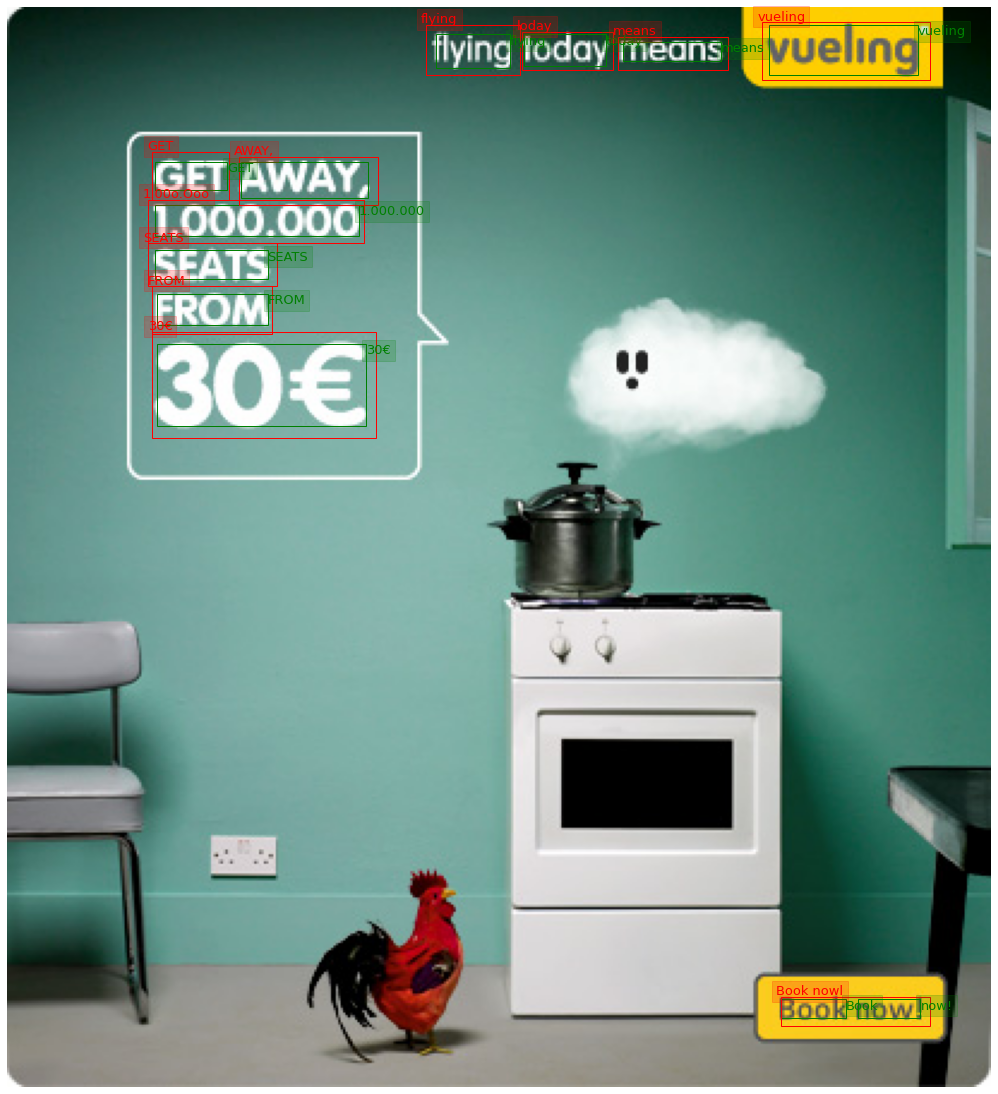

In [ ]:
# all images / one sample image
# for i in range(len(images)):
i = 0

im = plot_results(images[i], ground_truth[i], predicted[i])  
im.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)

im.savefig('%s/result_%s393.png' % (output_dir, file_name))
im.show()
